# Importing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
data = pd.read_csv('polynomial_train.csv')

In [3]:
data.head(10)

,Unnamed: 0,A,B,C,label
0,0,-1113.924581,952.105404,-276.045881,-1.294289e+03
1,1,-2229.480228,1111.488568,-93.454107,-2.714687e+04
2,2,2717.257713,53.431237,-179.228591,6.474300e+04
3,3,-1638.783965,-632.919447,-106.170237,-7.349871e+03
4,4,5173.934338,-721.895577,-75.074840,1.651328e+06
5,5,78.647106,53.550375,-140.981347,-7.752982e-03
6,6,-1448.431501,1075.497906,-101.891768,-3.844969e+03
7,7,3878.144241,-627.073113,-260.057712,3.700918e+05
8,8,-89.030667,-100.676391,-259.836862,-7.145428e-01
9,9,2251.620515,489.558034,-223.115109,2.636708e+04


In [4]:
m=len(data)
m

50000

In [5]:
data.columns

Index(['Unnamed: 0', 'A', 'B', 'C', 'label'], dtype='object')

In [6]:
#importing dataset
x = data.iloc[:30000,1:-1].values

y = data.iloc[:30000,-1].values
y=y[np.newaxis,:]
y=y.T
y.shape
A=x[:,0]
B=x[:,1]
C=x[:,2]


In [7]:
m,n=x.shape
m,n
A.shape,y.shape

((30000,), (30000, 1))

# Plots

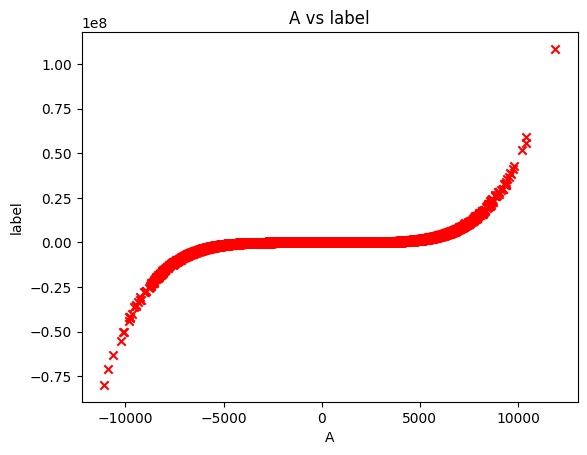

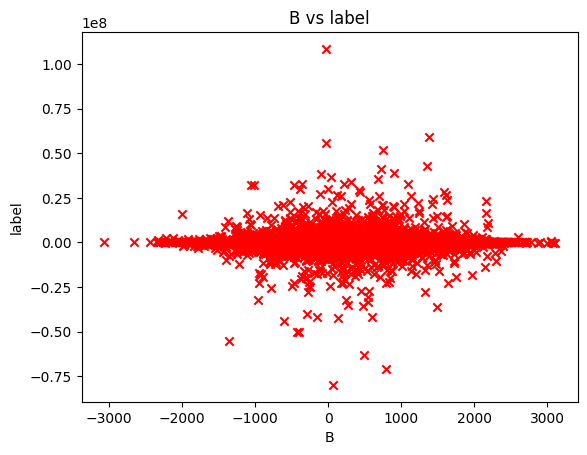

<function matplotlib.pyplot.show(close=None, block=None)>

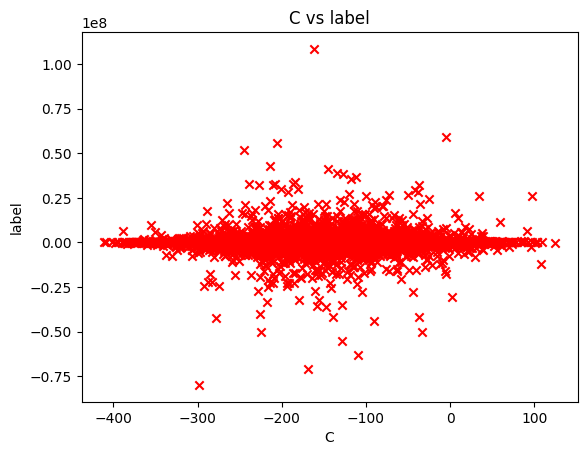

In [8]:
plt.scatter(A,y,marker='x',c='r')
plt.xlabel("A")
plt.ylabel("label")
plt.title("A vs label")
plt.show()

plt.scatter(B,y,marker='x',c='r')
plt.xlabel("B")
plt.ylabel("label")
plt.title("B vs label")
plt.show()

plt.scatter(C,y,marker='x',c='r')
plt.xlabel("C")
plt.ylabel("label")
plt.title("C vs label")
plt.show

In [9]:
mu     = np.mean(x,axis=0)   
sigma  = np.std(x,axis=0) 
x_mean = (x - mu)
x_norm = (x - mu)/sigma

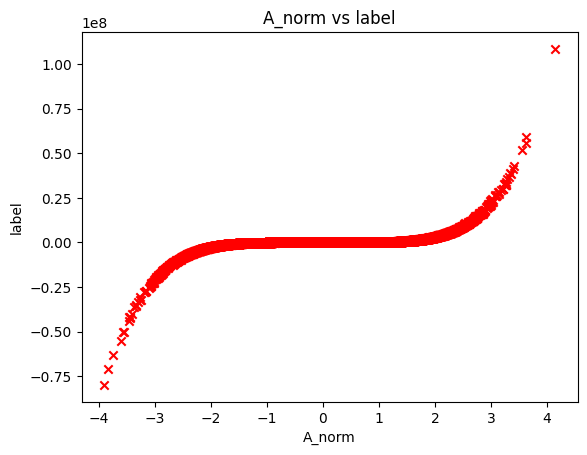

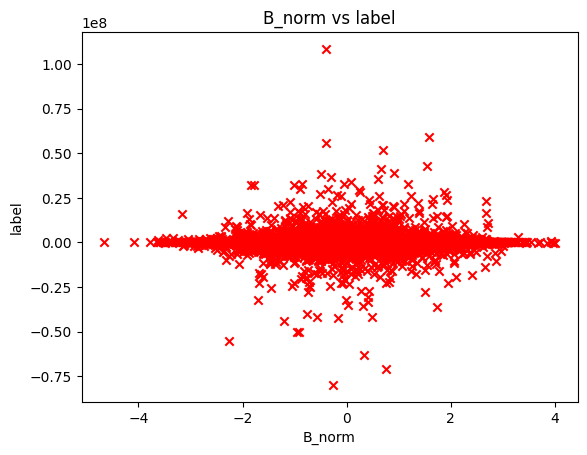

<function matplotlib.pyplot.show(close=None, block=None)>

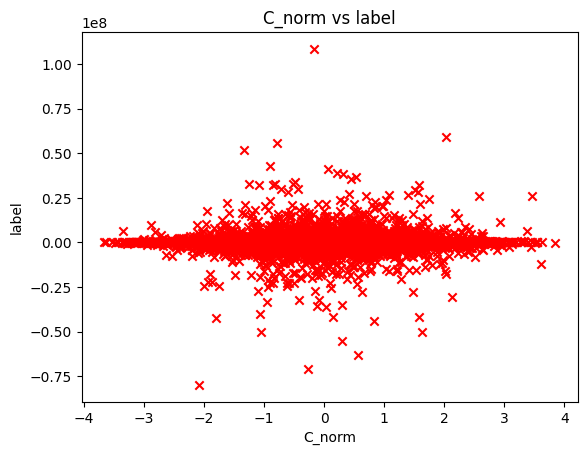

In [10]:
plt.scatter(x_norm[:,0],y,marker='x',c='r')
plt.xlabel("A_norm")
plt.ylabel("label")
plt.title("A_norm vs label")
plt.show()

plt.scatter(x_norm[:,1],y,marker='x',c='r')
plt.xlabel("B_norm")
plt.ylabel("label")
plt.title("B_norm vs label")
plt.show()

plt.scatter(x_norm[:,2],y,marker='x',c='r')
plt.xlabel("C_norm")
plt.ylabel("label")
plt.title("C_norm vs label")
plt.show

# n- degree polynomial

In [11]:
def poly(x,pow):
  m=x.shape[0]
  n=(((pow)*(pow+1)*((2*pow)+1))+(9*(pow)*(pow+1))+(12*pow))//12
  x_poly=np.zeros((m,n))
  k=0
  i=0
  j=0
  while(pow!=0):
    x_poly[:,k]=((x[:,0]**(i))*(x[:,1]**(j))*(x[:,2]**(pow-i-j)))
    j=j+1
    k=k+1
    if(j>(pow-i)):
      i=i+1
      j=0
    if(i>pow):
      pow=pow-1
      i=0
  return x_poly

# Cost function

In [12]:
def predict(i, w, b): 
    xi = X[i]
    xi=xi[np.newaxis,:]
    #xi=xi.T
    p = np.dot(xi, w) + b     
    return p

In [13]:
def compute_cost(X, y, w, b): 
                               
    f_wb = np.dot(X, w) + b           
    cost = ((f_wb - y)**2) / (2 * m)
    cost=np.sum(cost)
    
    return cost

# Gradient Descent

In [14]:
def compute_gradient(X, y, w, b): 
   
    m,n = X.shape           #(number of examples, number of features)
    
    y_hat = np.dot(X,w) + b                      
    err = (y_hat - y)
    
    dj_db = np.sum(err)
    dj_db = dj_db / m 
    
    dj_dw = (1/m)*(np.dot(X.T, err))  
                                   
        
    return dj_db, dj_dw

In [15]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    J_history = []
    w_history = []
   
    w = w_in
    b = b_in
    
    for i in range(num_iters):

        
        dj_db,dj_dw = gradient_function(X, y, w, b)   
            
        w = w - alpha * dj_dw
                    
        b = b - alpha * dj_db    
        
        
         # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing 


# Degree selection

In [16]:
x_cv = data.iloc[30000:,1:-1].values
y_cv = data.iloc[30000:,-1].values
y_cv=y_cv[np.newaxis,:]
y_cv=y_cv.T

In [17]:
mu     = np.mean(x_cv,axis=0)   
sigma  = np.std(x_cv,axis=0) 
x_mean = (x_cv - mu)
x_cv = (x_cv - mu)/sigma

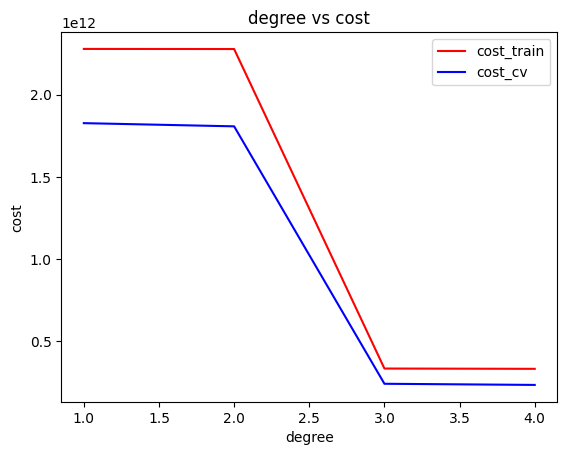

In [18]:
cost_train=[]
cost_cv=[]
for i in range(1,5):


    X=poly(x_norm,i)
    m,n=X.shape
    
    iterations = 1500
    alpha = 0.01
    
    
    w = np.zeros((n,1))
    b = 0
    
    for j in range(iterations):

        
        dj_db,dj_dw = compute_gradient(X, y, w, b)   
            
        w = w - alpha * dj_dw
                    
        b = b - alpha * dj_db  
      
    cost_train_i=compute_cost(X, y, w, b)
    
    cost_train.append(cost_train_i)
    
    
    
    X_cv=poly(x_cv,i)
    m_cv,n_cv=X_cv.shape
    
    iterations = 1500
    alpha = 0.01
    
    
    w_cv = np.zeros((n_cv,1))
    b_cv = 0
    
    for j in range(iterations):

        
        dj_db,dj_dw = compute_gradient(X_cv,y_cv , w_cv, b_cv)   
            
        w_cv = w_cv - alpha * dj_dw
                    
        b_cv = b_cv - alpha * dj_db  
      
    cost_cv_i=compute_cost(X_cv, y_cv, w_cv, b_cv)
    
    cost_cv.append(cost_cv_i)
    

t = np.arange(1, 5)
plt.plot(t,cost_train, color='r',label='cost_train')
plt.plot(t,cost_cv,color='b',label='cost_cv')

plt.xlabel("degree")
plt.ylabel("cost")
plt.title("degree vs cost")
plt.legend(["cost_train", "cost_cv"], loc ="upper right")
plt.show()
    

# Updating Parameters

In [19]:
X=poly(x_norm,5)
m,n=X.shape

In [20]:
initial_w = np.zeros((n,1))
initial_b = 0
# some gradient descent settings
iterations = 20000
alpha = 0.001
# run gradient descent 
w_norm,b_norm,J_history, w_history = gradient_descent(X ,y, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w_norm, b_norm)

Iteration    0: Cost 98588404131.61   
Iteration 2000: Cost 569054.88   
Iteration 4000: Cost 134569.88   
Iteration 6000: Cost 45830.70   
Iteration 8000: Cost 22879.88   
Iteration 10000: Cost 14162.41   
Iteration 12000: Cost  9501.68   
Iteration 14000: Cost  6544.79   
Iteration 16000: Cost  4548.63   
Iteration 18000: Cost  3172.48   
w,b found by gradient descent: [[ 2.35848297e-02]
 [-4.77595101e-03]
 [-1.29605569e-01]
 [ 2.84708550e-01]
 [ 1.73613057e+00]
 [ 2.62077075e+00]
 [-3.98006585e+00]
 [ 8.55395298e-01]
 [-6.18498247e+00]
 [ 1.28722461e+01]
 [ 1.85104641e+02]
 [ 1.62600341e+00]
 [ 1.47797410e+01]
 [ 1.28643086e+02]
 [ 1.46201824e+02]
 [ 1.17919805e+01]
 [ 4.71683579e+02]
 [ 3.44836878e+03]
 [ 2.29709362e+03]
 [ 6.75840718e+03]
 [ 8.82207057e+04]
 [-7.08454347e-01]
 [ 8.45736301e-01]
 [-1.06803054e+00]
 [-2.02877487e-01]
 [ 4.97306478e+00]
 [ 1.62719639e+00]
 [-1.40566126e+00]
 [ 5.52636684e+00]
 [ 2.49078922e+02]
 [ 3.77643476e-01]
 [ 6.68983099e+01]
 [ 9.68060935e+01]

In [22]:
compute_cost(X, y, w= w_norm, b= b_norm)

2216.8319393537718

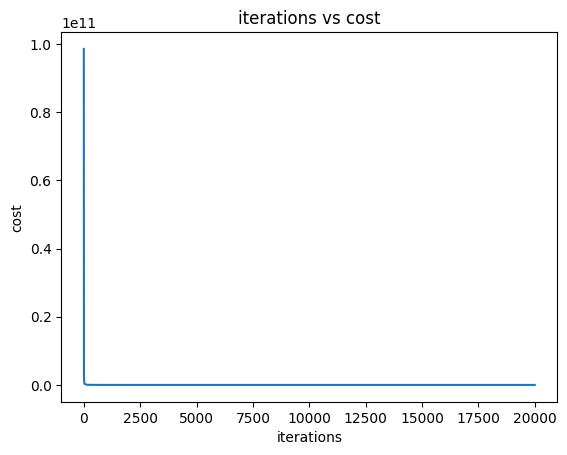

In [23]:
t = np.arange(0, iterations)
plt.plot(t,J_history)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("iterations vs cost")

plt.show()

# RMSE and R2 of train data

In [24]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / m)
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = np.dot(X, w_norm) + b_norm

print("RMSE")
print(rmse(y, Y_pred))
print("R2 Score")
print(r2_score(y, Y_pred))

RMSE
[66.58576333]
R2 Score
[1.]


# RMSE and R2 of Cross validation set

In [25]:
mu     = np.mean(x_cv,axis=0)   
sigma  = np.std(x_cv,axis=0) 
x_mean = (x_cv - mu)
x_cv = (x_cv - mu)/sigma
X_cv = poly(x_cv,5)

In [26]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / m)
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred_cv = np.dot(X_cv, w_norm) + b_norm

print("RMSE")
print(rmse(y_cv, Y_pred_cv))
print("R2 Score")
print(r2_score(y_cv, Y_pred_cv))

RMSE
[36912.55080672]
R2 Score
[0.99972172]


# Comparing data vs prediction

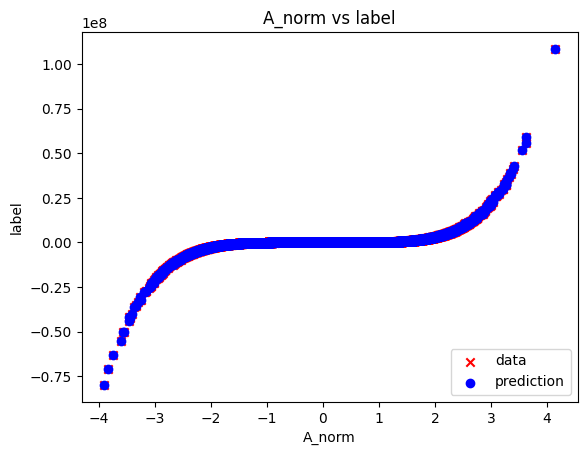

In [27]:
plt.scatter(x_norm[:,0],y,marker='x',c='r')
plt.scatter(x_norm[:,0],Y_pred,marker='o',c='b')
plt.xlabel("A_norm")
plt.ylabel("label")
plt.title("A_norm vs label")
plt.legend(["data", "prediction"], loc ="lower right")
plt.show()

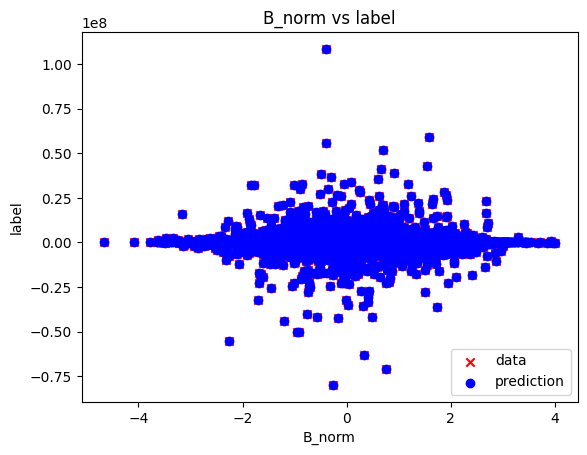

In [28]:
plt.scatter(x_norm[:,1],y,marker='x',c='r')
plt.scatter(x_norm[:,1],Y_pred,marker='o',c='b')
plt.xlabel("B_norm")
plt.ylabel("label")
plt.title("B_norm vs label")
plt.legend(["data", "prediction"], loc ="lower right")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

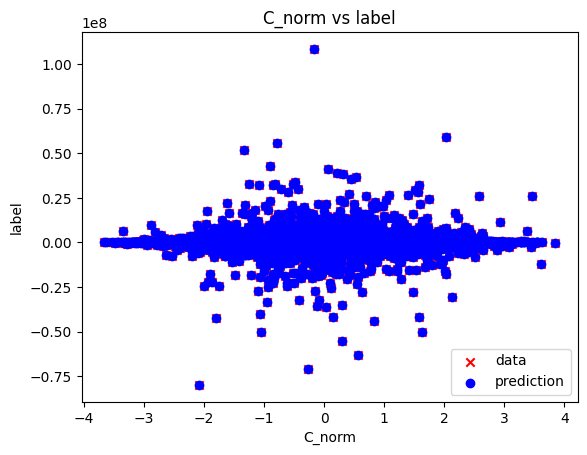

In [29]:
plt.scatter(x_norm[:,2],y,marker='x',c='r')
plt.scatter(x_norm[:,2],Y_pred,marker='o',c='b')
plt.xlabel("C_norm")
plt.ylabel("label")
plt.title("C_norm vs label")
plt.legend(["data", "prediction"], loc ="lower right")
plt.show

In [30]:
predict(i=111,w=w_norm,b= b_norm),y[111]

(array([[6835.60619157]]), array([6933.94707365]))

# Prediction and saving test csv file

In [31]:
#importing dataset
data_pred = pd.read_csv('polynomial_test_data.csv')
x_test= data_pred.iloc[:,1:4].values


In [32]:
mu     = np.mean(x_test,axis=0)   
sigma  = np.std(x_test,axis=0) 
x_test_norm = (x_test - mu)/sigma
x_test_norm.shape

(20000, 3)

In [33]:
X_test=poly(x_test_norm,5)

In [34]:
y_test=np.dot(X_test, w_norm) + b_norm

In [35]:
y_test.shape

(20000, 1)

In [36]:
data_pred.insert(0,'label',y_test)

In [37]:
#saving the dataframe as a csv file
data_pred.to_csv('polynomial_test_data_pred.csv',index=False)